In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns
from __future__ import unicode_literals  # or use u"unicode strings"

In [2]:
vioxx_traj1= pt.iterload('COX-2_vioxx_0-300ns_strip.nc', 'Vioxx_Strip.parm7',stride=1)
vioxx_traj2= pt.iterload('Vioxx_0-300ns_strip.nc', 'Vioxx_Strip.parm7',stride=1)

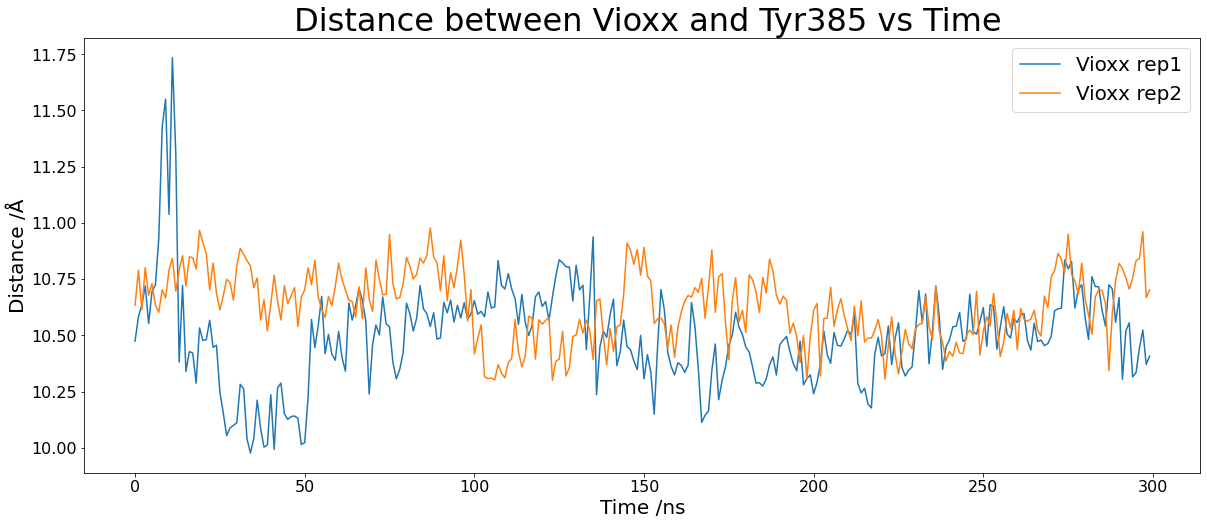

In [3]:
dist1 = pt.distance(vioxx_traj1, ':1 :354')
plt.figure(figsize = (20,8))
plt.plot(np.mean(dist1.reshape(300,20), axis=1),label="Vioxx rep1")
dist2 = pt.distance(vioxx_traj2, ':1 :354')
plt.plot(np.mean(dist2.reshape(300,20), axis=1),label="Vioxx rep2")

plt.xlabel('Time /ns',fontsize=20)
plt.ylabel('Distance /Å',fontsize=20)
plt.title(' Distance between Vioxx and Tyr385 vs Time',fontsize=32)
plt.legend(loc='upper right', prop={'size': 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("dist_vioxx.png",dpi=400,bbox_inches='tight')

In [4]:
AA_head_traj1= pt.iterload('AA_head_0-300ns_strip.nc', 'AA_head_strip.parm7',stride=1)
AA_head_traj2= pt.iterload('AA_head_rep2_strip.nc', 'AA_head_strip.parm7',stride=1)
AA_tail_traj1= pt.iterload('AA_tail_strip_0-300ns_strip.nc', 'AA_tail_strip.parm7',stride=1)
AA_tail_traj2= pt.iterload('AA_tail_rep2_strip.nc', 'AA_tail_strip.parm7',stride=1)
AA_tail_traj3= pt.iterload('AA_tail_rep3_strip.nc', 'AA_tail_strip.parm7',stride=1)

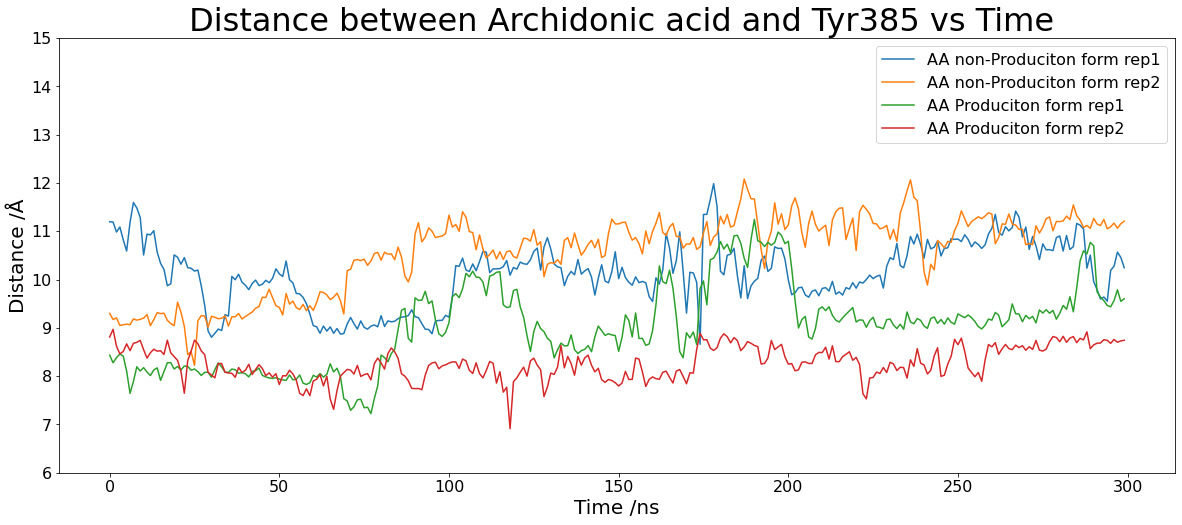

In [32]:
dist3 = pt.distance(AA_head_traj1, ':1 :354')
dist4 = pt.distance(AA_head_traj2, ':1 :354')
dist5 = pt.distance(AA_tail_traj1, ':1 :908')
dist6 = pt.distance(AA_tail_traj2, ':1 :908')
plt.figure(figsize = (20,8))
plt.plot(np.mean(dist3.reshape(300,20), axis=1),label="AA non-Produciton form rep1")
plt.plot(np.mean(dist4.reshape(300,20), axis=1),label="AA non-Produciton form rep2")
plt.plot(np.mean(dist5.reshape(300,20), axis=1),label="AA Produciton form rep1")
plt.plot(np.mean(dist6.reshape(300,20), axis=1),label="AA Produciton form rep2")
plt.xlabel('Time /ns',fontsize=20)
plt.ylabel('Distance /Å',fontsize=20)
plt.title(' Distance between Archidonic acid and Tyr385 vs Time',fontsize=32)
plt.ylim(6, 15)
plt.legend(loc='upper right', prop={'size': 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig("dist_AA.png",dpi=400,bbox_inches='tight')

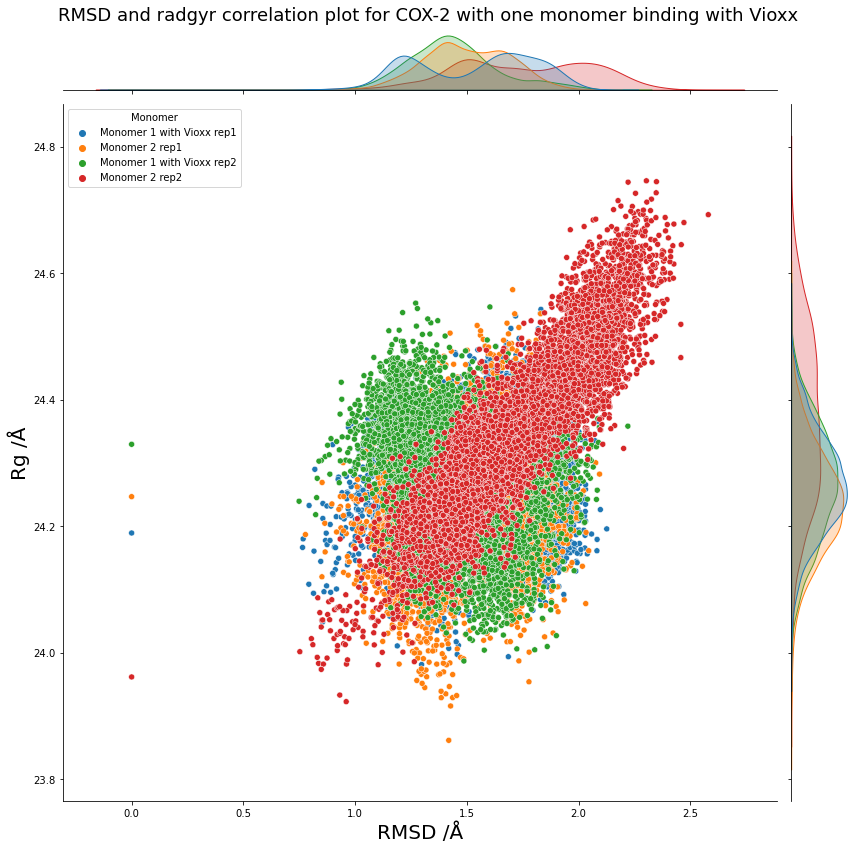

In [68]:
rmsd_vioxx_m1 = pt.rmsd(vioxx_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_vioxx_m2 = pt.rmsd(vioxx_traj1,ref=0, mask=':556-1109@C,N,O')
rg_dimer1 = pt.radgyr(vioxx_traj1, mask=':2-555')
rg_dimer2 = pt.radgyr(vioxx_traj1, mask=':556-1109')
rmsd_vioxx2_m1 = pt.rmsd(vioxx_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_vioxx2_m2 = pt.rmsd(vioxx_traj2,ref=0, mask=':556-1109@C,N,O')
rg_2_dimer1 = pt.radgyr(vioxx_traj2, mask=':2-555')
rg_2_dimer2 = pt.radgyr(vioxx_traj2, mask=':556-1109')
df1 = pd.DataFrame({'RMSD /Å': rmsd_vioxx_m1, 'Rg /Å':rg_dimer1, 'Monomer': 'Monomer 1 with Vioxx rep1'}, index=[np.arange(0,6000)])
df2 = pd.DataFrame({'RMSD /Å': rmsd_vioxx_m2, 'Rg /Å':rg_dimer2, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(6000,12000)])
df3 = pd.DataFrame({'RMSD /Å': rmsd_vioxx2_m1, 'Rg /Å':rg_2_dimer1, 'Monomer': 'Monomer 1 with Vioxx rep2'}, index=[np.arange(12000,18000)])
df4 = pd.DataFrame({'RMSD /Å': rmsd_vioxx2_m2, 'Rg /Å':rg_2_dimer2, 'Monomer': 'Monomer 2 rep2'}, index=[np.arange(18000,24000)])
frames = [df1, df2, df3, df4]
result = pd.concat(frames)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for COX-2 with one monomer binding with Vioxx",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("Vioxx.png",dpi=400)

In [46]:
#rmsd_vioxx_rep1= pt.rmsd(vioxx_traj1, ref=0 )
#rmsd_vioxx_rep2= pt.rmsd(vioxx_traj2, ref=0 )
#df5 = pd.DataFrame({'RMSD /Å': rmsd_vioxx_m1, 'Distance /Å':dist1, 'Monomer': 'Monomer 1 with Vioxx rep1'}, index=[np.arange(24000,30000)])
#df6 = pd.DataFrame({'RMSD /Å': rmsd_vioxx_m2, 'Distance /Å':dist1, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(30000,36000)])
#df7 = pd.DataFrame({'RMSD /Å': rmsd_vioxx2_m1, 'Distance /Å':dist2, 'Monomer': 'Monomer 1 with Vioxx rep2'}, index=[np.arange(36000,42000)])
#df8 = pd.DataFrame({'RMSD /Å': rmsd_vioxx2_m2, 'Distance /Å':dist2, 'Monomer': 'Monomer 2 rep2'}, index=[np.arange(42000,48000)])
#frames = [df5, df6, df7, df8]
#result = pd.concat(frames)
#h=sns.jointplot(data=result, x="RMSD /Å", y="Distance /Å", hue="Monomer", height=12, ratio=10, space=0.4)
#h.set_axis_labels("RMSD /Å", "Distance between Vioxx and Tyr385 /Å", fontsize=20)
#h.fig.suptitle("RMSD and distance correlation plot for COX-2 with one monomer binding with Vioxx",fontsize=24)

#h.fig.tight_layout()
#h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
#plt.savefig("High resoltion.png",dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


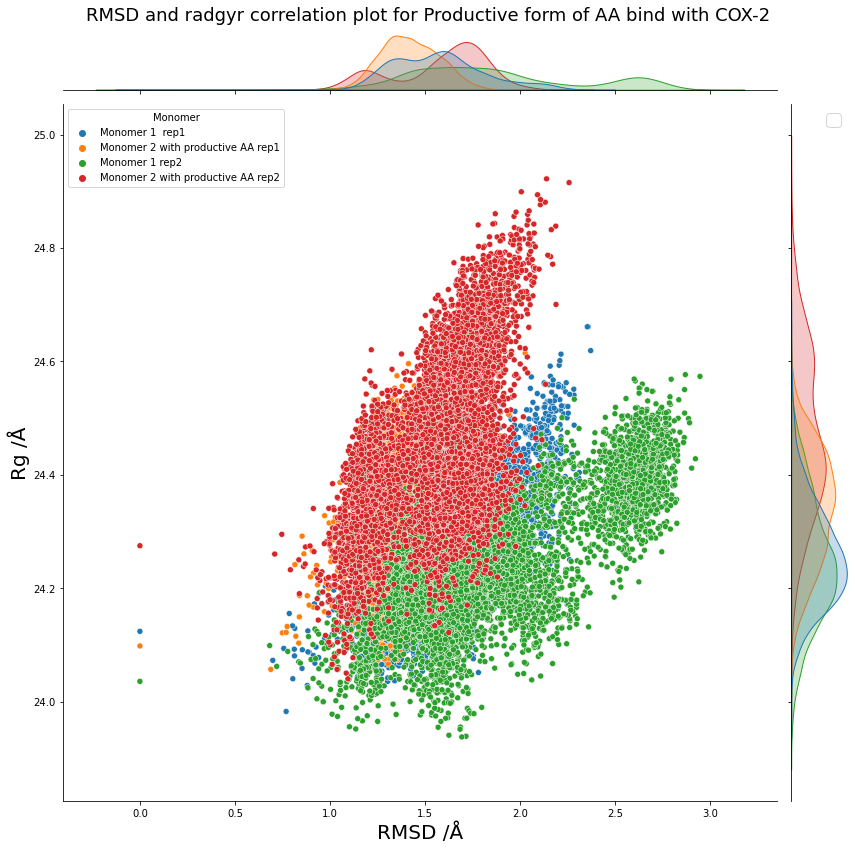

In [69]:
rmsd_AA_m1 = pt.rmsd(AA_tail_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_AA_m2 = pt.rmsd(AA_tail_traj1,ref=0, mask=':556-1109@C,N,O')
rg_AA_m1 = pt.radgyr(AA_tail_traj1, mask=':2-555')
rg_AA_m2 = pt.radgyr(AA_tail_traj1, mask=':556-1109')
rmsd_AA2_m1 = pt.rmsd(AA_tail_traj3,ref=0, mask=':2-555@C,N,O')
rmsd_AA2_m2 = pt.rmsd(AA_tail_traj3,ref=0, mask=':556-1109@C,N,O')
rg_AA2_m1 = pt.radgyr(AA_tail_traj3, mask=':2-555')
rg_AA2_m2 = pt.radgyr(AA_tail_traj3, mask=':556-1109')
df5 = pd.DataFrame({'RMSD /Å': rmsd_AA_m1, 'Rg /Å':rg_AA_m1, 'Monomer': 'Monomer 1  rep1'}, index=[np.arange(24000,30000)])
df6 = pd.DataFrame({'RMSD /Å': rmsd_AA_m2, 'Rg /Å':rg_AA_m2, 'Monomer': 'Monomer 2 with productive AA rep1' }, index=[np.arange(30000,36000)])
df7 = pd.DataFrame({'RMSD /Å': rmsd_AA2_m1, 'Rg /Å':rg_AA2_m1, 'Monomer': 'Monomer 1 rep2'}, index=[np.arange(36000,42000)])
df8 = pd.DataFrame({'RMSD /Å': rmsd_AA2_m2, 'Rg /Å':rg_AA2_m2, 'Monomer': 'Monomer 2 with productive AA rep2'}, index=[np.arange(42000,48000)])
frames2 = [df5, df6, df7, df8]
result = pd.concat(frames2)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for Productive form of AA bind with COX-2",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.legend(prop={'size': 18})
plt.savefig("AA_production.png",dpi=400)

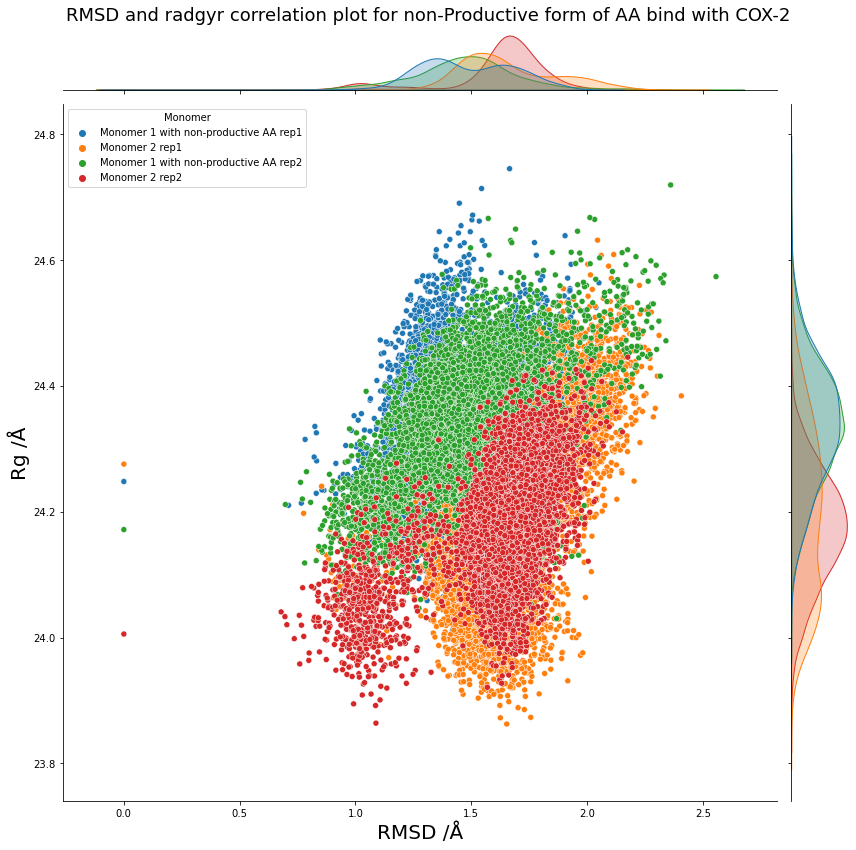

In [67]:
rmsd_nAA_m1 = pt.rmsd(AA_head_traj1,ref=0, mask=':2-555@C,N,O')
rmsd_nAA_m2 = pt.rmsd(AA_head_traj1,ref=0, mask=':556-1109@C,N,O')
rg_nAA_m1 = pt.radgyr(AA_head_traj1, mask=':2-555')
rg_nAA_m2 = pt.radgyr(AA_head_traj1, mask=':556-1109')
rmsd_nAA2_m1 = pt.rmsd(AA_head_traj2,ref=0, mask=':2-555@C,N,O')
rmsd_nAA2_m2 = pt.rmsd(AA_head_traj2,ref=0, mask=':556-1109@C,N,O')
rg_nAA2_m1 = pt.radgyr(AA_head_traj2, mask=':2-555')
rg_nAA2_m2 = pt.radgyr(AA_head_traj2, mask=':556-1109')
df9 = pd.DataFrame({'RMSD /Å': rmsd_nAA_m1, 'Rg /Å':rg_nAA_m1, 'Monomer': 'Monomer 1 with non-productive AA rep1'}, index=[np.arange(48000,54000)])
df10 = pd.DataFrame({'RMSD /Å': rmsd_nAA_m2, 'Rg /Å':rg_nAA_m2, 'Monomer': 'Monomer 2 rep1' }, index=[np.arange(54000,60000)])
df11 = pd.DataFrame({'RMSD /Å': rmsd_nAA2_m1, 'Rg /Å':rg_nAA2_m1, 'Monomer': 'Monomer 1 with non-productive AA rep2'}, index=[np.arange(60000,66000)])
df12 = pd.DataFrame({'RMSD /Å': rmsd_nAA2_m2, 'Rg /Å':rg_nAA2_m2, 'Monomer': 'Monomer 2 rep2'}, index=[np.arange(66000,72000)])
frames3 = [df9, df10, df11, df12]
result = pd.concat(frames3)
h=sns.jointplot(data=result, x="RMSD /Å", y="Rg /Å", hue="Monomer", height=12, ratio=10, space=0.4)
h.set_axis_labels("RMSD /Å", "Rg /Å", fontsize=20)
h.fig.suptitle("RMSD and radgyr correlation plot for non-Productive form of AA bind with COX-2",fontsize=18)

h.fig.tight_layout()
h.fig.subplots_adjust(top=0.95) # Reduce plot to make room 
plt.savefig("AA_non-production.png",dpi=400)

In [5]:
pt.superpose(vioxx_traj1, ref=0)
pt.superpose(vioxx_traj2, ref=0)
pt.superpose(AA_head_traj1, ref=0)
pt.superpose(AA_head_traj2, ref=0)
pt.superpose(AA_tail_traj1, ref=0)
pt.superpose(AA_tail_traj3, ref=0)


Vioxx_rmsf1=pt.rmsf(traj= vioxx_traj1[int(len(vioxx_traj1)*0.75):],mask='byres')   
V_M1_1=Vioxx_rmsf1[1:555]
V_M2_1=Vioxx_rmsf1[555:]
Vioxx_rmsf1_stack=np.vstack((V_M1_1.T[1],V_M2_1.T[1]))
print (Vioxx_rmsf1_stack)
Vioxx_rmsf2=pt.rmsf(traj= vioxx_traj2[int(len(vioxx_traj2)*0.75):],mask='byres')   
V_M1_2=Vioxx_rmsf2[1:555]
V_M2_2=Vioxx_rmsf2[555:]
Vioxx_rmsf2_stack=np.vstack((V_M1_2.T[1],V_M2_2.T[1]))
print (Vioxx_rmsf2_stack)

nAA_rmsf1=pt.rmsf(traj= AA_head_traj1[int(len(AA_head_traj1)*0.75):],mask='byres')   
nAA_M1_1=nAA_rmsf1[1:555]
nAA_M2_1=nAA_rmsf1[555:]
nAA_rmsf1_stack=np.vstack((nAA_M1_1.T[1],nAA_M2_1.T[1]))
print (nAA_rmsf1_stack)
nAA_rmsf2=pt.rmsf(traj= AA_head_traj2[int(len(AA_head_traj2)*0.75):],mask='byres')     
nAA_M1_2=nAA_rmsf2[1:555]
nAA_M2_2=nAA_rmsf2[555:]
nAA_rmsf2_stack=np.vstack((nAA_M1_2.T[1],nAA_M2_2.T[1]))
print (nAA_rmsf2_stack)

AA_rmsf1=pt.rmsf(traj= AA_tail_traj1[int(len(AA_tail_traj1)*0.75):],mask='byres')   
AA_M1_1=AA_rmsf1[1:555]
AA_M2_1=AA_rmsf1[555:]
AA_rmsf1_stack=np.vstack((AA_M1_1.T[1],AA_M2_1.T[1]))
print (AA_rmsf1_stack)
AA_rmsf2=pt.rmsf(traj= AA_tail_traj3[int(len(AA_tail_traj3)*0.75):],mask='byres')     
AA_M1_2=AA_rmsf2[1:555]
AA_M2_2=AA_rmsf2[555:]
AA_rmsf2_stack=np.vstack((AA_M1_2.T[1],AA_M2_2.T[1]))
print (AA_rmsf2_stack)

[[2.69732618 1.79949792 1.14493466 ... 0.88128027 0.49566382 0.55250371]
 [1.14359299 1.03072694 0.77142972 ... 1.01363368 0.67550756 0.77218155]]
[[2.02886846 1.79820206 1.32658255 ... 0.83392748 0.53509881 0.59597863]
 [1.59344412 1.44748676 1.02746752 ... 0.86244996 0.52401871 0.56645197]]
[[1.38596997 1.33263961 1.1066082  ... 0.83286837 0.51628006 0.71686174]
 [1.3123965  1.27817911 0.93917258 ... 0.91168948 0.60350738 0.67874984]]
[[2.17945534 2.4786061  1.6756694  ... 1.04651476 0.63313536 0.75759518]
 [1.27294705 1.36682474 0.91736429 ... 0.91793043 0.57256322 0.64552821]]
[[1.97959974 1.61331171 0.9833011  ... 1.01514015 0.5679854  0.72798736]
 [1.85302248 1.41089624 0.82803516 ... 0.80578479 0.48308935 0.56980128]]
[[2.56822111 2.03709173 1.5216562  ... 0.88571977 0.6255667  0.66665032]
 [2.13415367 1.82203242 1.51135788 ... 0.84769996 0.53128427 0.5845903 ]]


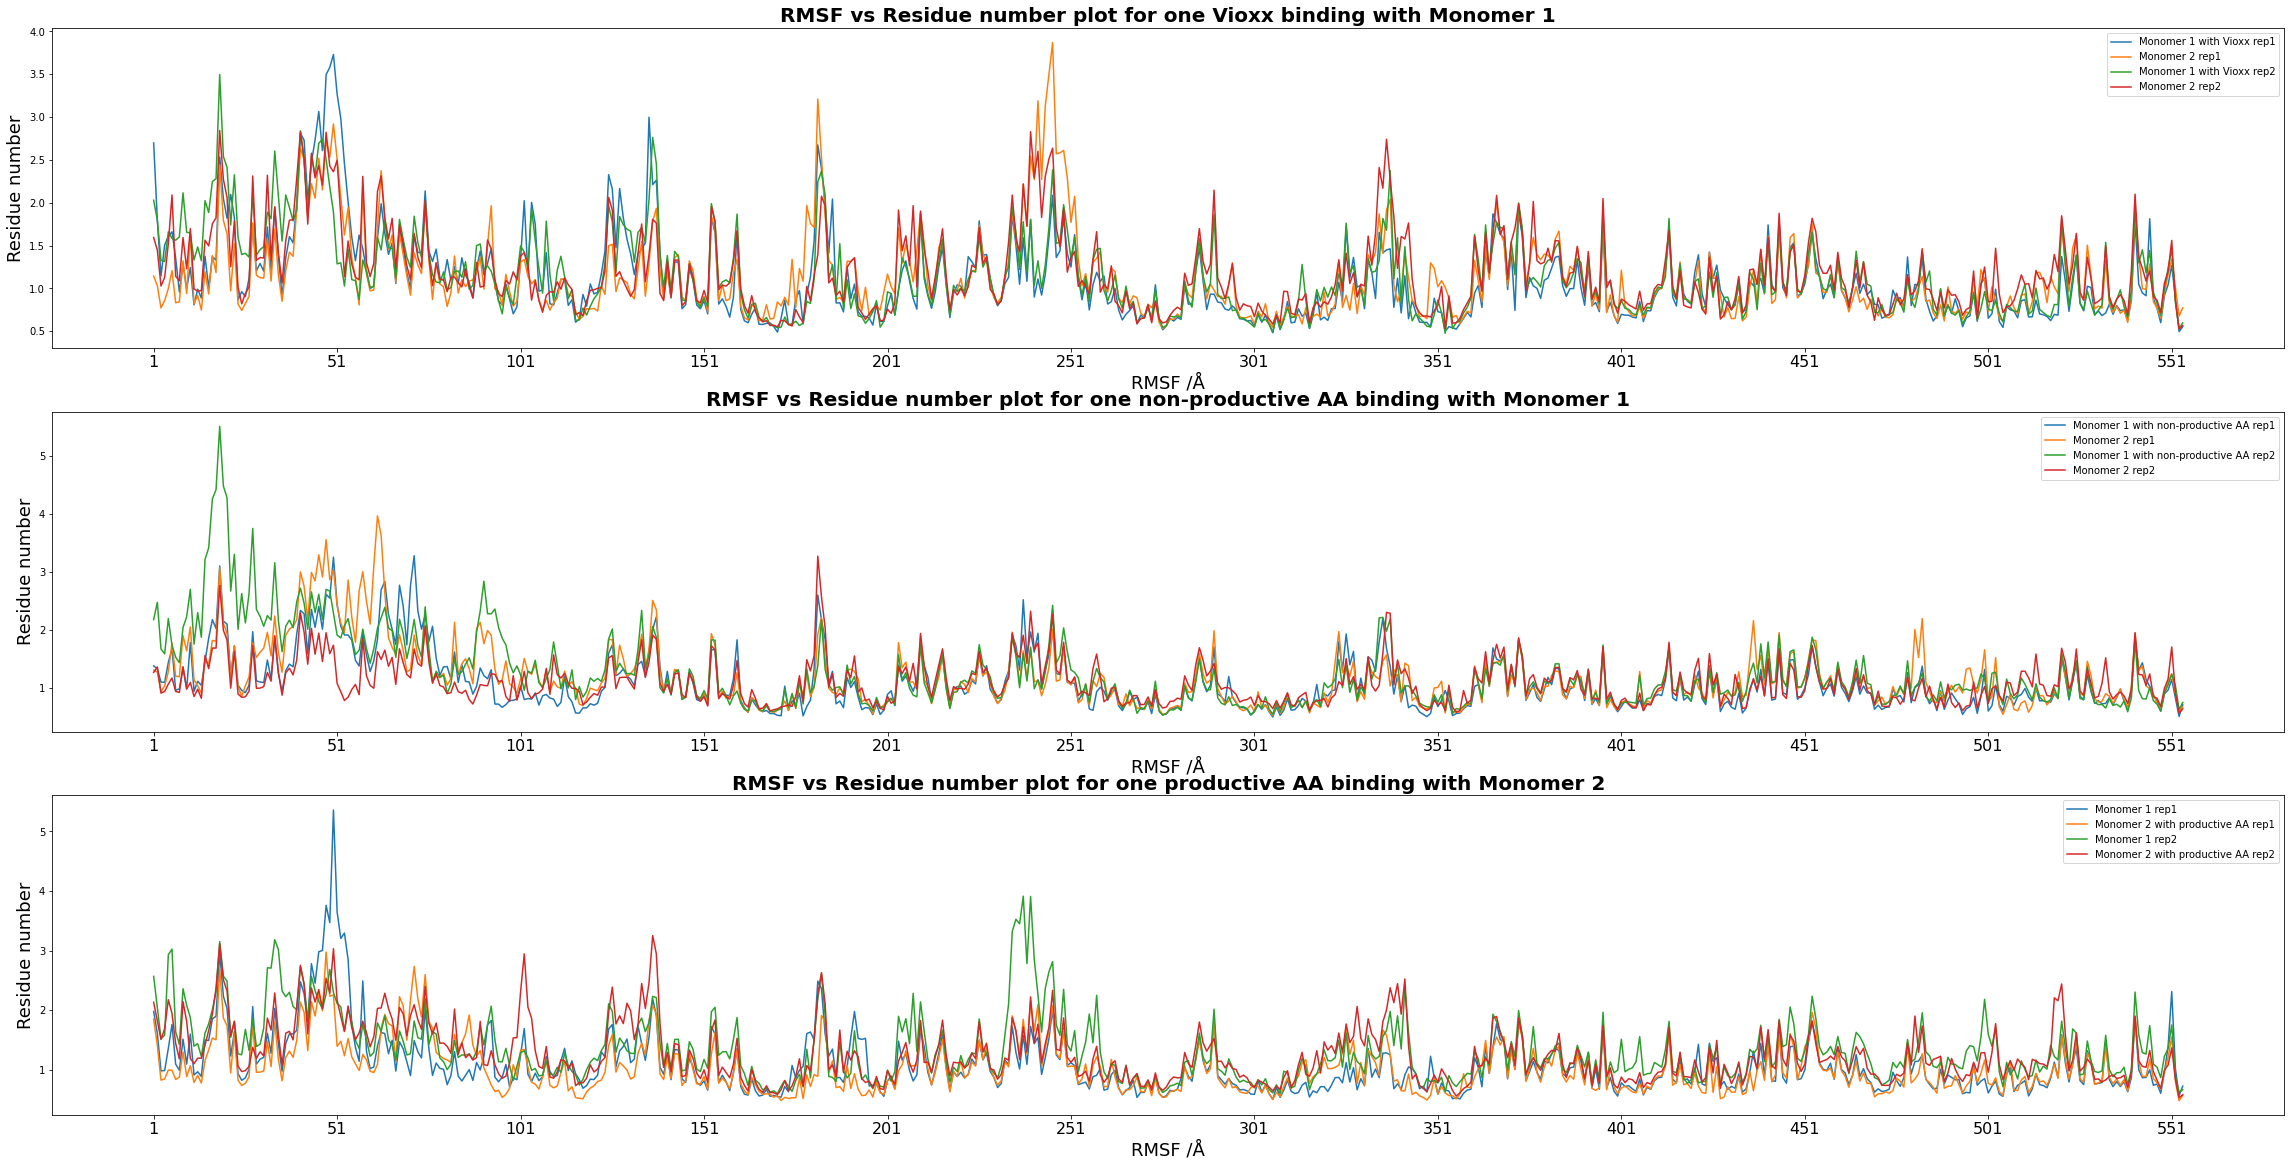

In [17]:
fig, axs = plt.subplots(3, figsize=(40,20))

res_seq=np.array(range(1,555))
axs[0].plot(res_seq,V_M1_1.T[1],label= "Monomer 1 with Vioxx rep1")
axs[0].plot(res_seq,V_M2_1.T[1],label= "Monomer 2 rep1")
axs[0].plot(res_seq,V_M1_2.T[1],label= "Monomer 1 with Vioxx rep2")
axs[0].plot(res_seq,V_M2_2.T[1],label= "Monomer 2 rep2")
axs[0].legend(loc='upper right')
axs[0].set_xticks(range(1,554,50)) 
axs[0].set_xticklabels(range(1,554,50), fontsize=16)



axs[1].plot(res_seq,nAA_M1_1.T[1],label= "Monomer 1 with non-productive AA rep1")
axs[1].plot(res_seq,nAA_M2_1.T[1],label= "Monomer 2 rep1")
axs[1].plot(res_seq,nAA_M1_2.T[1],label= "Monomer 1 with non-productive AA rep2")
axs[1].plot(res_seq,nAA_M2_2.T[1],label= "Monomer 2 rep2")
axs[1].legend(loc='upper right')
axs[1].set_xticks(range(1,554,50)) 
axs[1].set_xticklabels(range(1,554,50),fontsize=16)



axs[2].plot(res_seq,AA_M1_1.T[1],label= "Monomer 1 rep1")
axs[2].plot(res_seq,AA_M2_1.T[1],label= "Monomer 2 with productive AA rep1")
axs[2].plot(res_seq,AA_M1_2.T[1],label= "Monomer 1 rep2")
axs[2].plot(res_seq,AA_M2_2.T[1],label= "Monomer 2 with productive AA rep2")
axs[2].legend(loc='upper right')
axs[2].set_xticks(range(1,554,50)) 
axs[2].set_xticklabels(range(1,554,50), fontsize=16)

axs[0].set_title('RMSF vs Residue number plot for one Vioxx binding with Monomer 1',fontweight="bold", size=20)
axs[1].set_title('RMSF vs Residue number plot for one non-productive AA binding with Monomer 1',fontweight="bold", size=20)
axs[2].set_title('RMSF vs Residue number plot for one productive AA binding with Monomer 2',fontweight="bold", size=20)

axs[0].set_xlabel('RMSF /Å', fontsize=18)
axs[0].set_ylabel('Residue number',fontsize=18)
axs[1].set_xlabel('RMSF /Å',fontsize=18)
axs[1].set_ylabel('Residue number',fontsize=18)
axs[2].set_xlabel('RMSF /Å',fontsize=18)
axs[2].set_ylabel('Residue number',fontsize=18)
#do not visualize the head and tail residues, because they rmsf value and unlikely involves the allosteric regulation
#plt.rcParams['font.size'] = '16'

#plt.xticks(range(1,554,50),fontsize=30)
#plt.yticks(fontsize=30)
#plt.xlabel('residue sequence',fontsize=34)
#plt.ylabel('RMSF /$\AA$',fontsize=34)
#plt.title('COX-2  RMSF vs Residues', fontdict = {'fontsize' : 54})
#plt.legend(loc='upper right',fontsize=30)

plt.savefig("rmsf_subplot.png",dpi=400,bbox_inches='tight')
